In [1]:
# %matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.facecolor'] = (1,1,1,1)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

%matplotlib widget

import os
# import csv
import math

from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]
def rnTime2(t,meanWidth):
    return t[:-math.ceil(meanWidth)+1]
def rnTime3(t,meanWidth):
    return t[math.ceil(meanWidth)+1:]

saveFigures is set to: True
Done loading packages


In [2]:

pathFigs = '../Figures/'
filePath= '../ExcessData/HMD/'


In [3]:
dfDK = pd.read_csv(filePath + 'DNKstmfout.csv')
dfSE = pd.read_csv(filePath + 'SWEstmfout.csv')

In [4]:

import datetime

In [5]:
# dfDK.tail(120)

# r = datetime.datetime.strptime(d + '-1', "%Y-W%W-%w")
dateDK = dfDK.Year.astype(str) + '-W'+dfDK.Week.astype(str).str.zfill(2)
dfDK2 = dfDK.copy() 
dfDK2['Date'] = [datetime.datetime.strptime(x + '-1', "%Y-W%W-%w") for x in dateDK]

dateSE = dfSE.Year.astype(str) + '-W'+dfSE.Week.astype(str).str.zfill(2)
dfSE2 = dfSE.copy() 
dfSE2['Date'] = [datetime.datetime.strptime(x + '-1', "%Y-W%W-%w") for x in dateSE]

In [6]:
# [datetime.date.fromisocalendar(int(x.Year),int(x.Week),1) for x in dfDK]
# dkDate.apply(lambda x:datetime.datetime.strptime(x+'-1',"%Y-W%W-w"))

In [7]:
# x = dkDate[0]
# x = "2013-W26"
# # datetime.datetime.strptime(x,"%Y-W%W-w")
# d = "2013-W26"
dfDKshort = dfDK2[dfDK2.Sex == 'b']
dfSEshort = dfSE2[dfSE2.Sex == 'b']

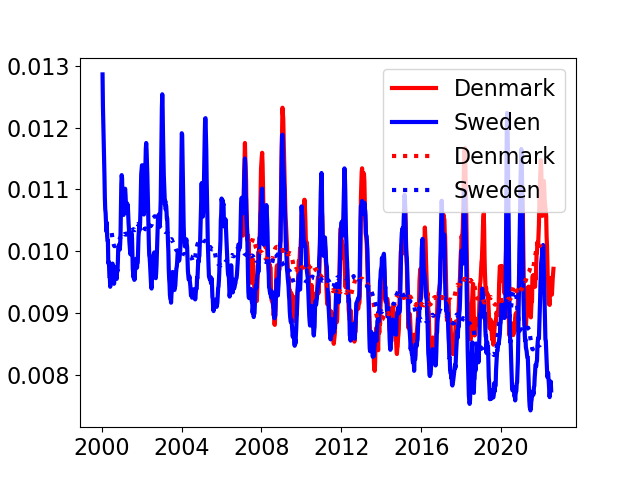

In [8]:
fig,ax = plt.subplots()

# ax.plot(dfDKshort.Date,dfDKshort['Total'],color='r',label='Denmark')
# ax.plot(dfSEshort.Date,dfSEshort['Total'],color='b',label='Sweden')
# ax.plot(dfDKshort.Date,dfDKshort['Total.1'],color='r',label='Denmark')
# ax.plot(dfSEshort.Date,dfSEshort['Total.1'],color='b',label='Sweden')
mw = 4
ax.plot(rnTime(dfDKshort.Date,mw),rnMean(dfDKshort['Total.1'],mw),color='r',label='Denmark')
ax.plot(rnTime(dfSEshort.Date,mw),rnMean(dfSEshort['Total.1'],mw),color='b',label='Sweden')
mw = 52
ax.plot(rnTime(dfDKshort.Date,mw),rnMean(dfDKshort['Total.1'],mw),color='r',ls=':',label='Denmark')
ax.plot(rnTime(dfSEshort.Date,mw),rnMean(dfSEshort['Total.1'],mw),color='b',ls=':',label='Sweden')
ax.legend()

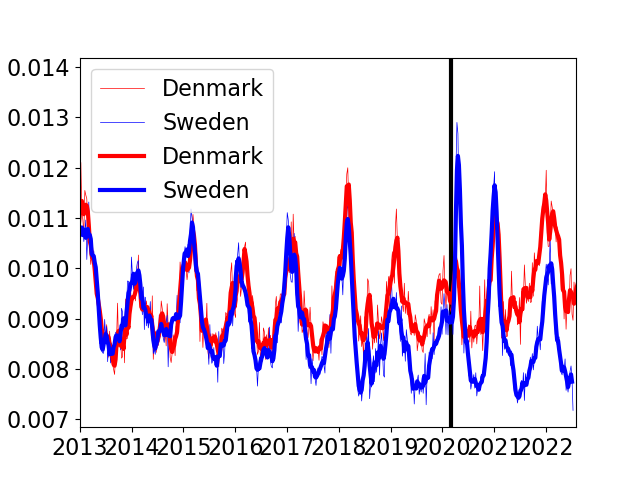

In [9]:
fig,ax = plt.subplots()

# ax.plot(dfDKshort.Date,dfDKshort['Total'],color='r',label='Denmark')
# ax.plot(dfSEshort.Date,dfSEshort['Total'],color='b',label='Sweden')
# ax.plot(dfDKshort.Date,dfDKshort['Total.1'],'.-',color='r',label='Denmark',lw=0.5)
# ax.plot(dfSEshort.Date,dfSEshort['Total.1'],'.-',color='b',label='Sweden',lw=0.5)
ax.plot(dfDKshort.Date,dfDKshort['Total.1'],color='r',label='Denmark',lw=0.5)
ax.plot(dfSEshort.Date,dfSEshort['Total.1'],color='b',label='Sweden',lw=0.5)
mw = 4
ax.plot(rnTime(dfDKshort.Date,mw),rnMean(dfDKshort['Total.1'],mw),color='r',label='Denmark')
ax.plot(rnTime(dfSEshort.Date,mw),rnMean(dfSEshort['Total.1'],mw),color='b',label='Sweden')
# mw = 52
# ax.plot(rnTime(dfDKshort.Date,mw),rnMean(dfDKshort['Total.1'],mw),color='r',ls=':',label='Denmark')
# ax.plot(rnTime(dfSEshort.Date,mw),rnMean(dfSEshort['Total.1'],mw),color='b',ls=':',label='Sweden')
ax.legend()

ax.set_xlim(left=np.datetime64('2013-01-01'),right=np.datetime64('2022-08-01'))

ax.axvline(np.datetime64('2020-03-01'),color='k',zorder=-2)

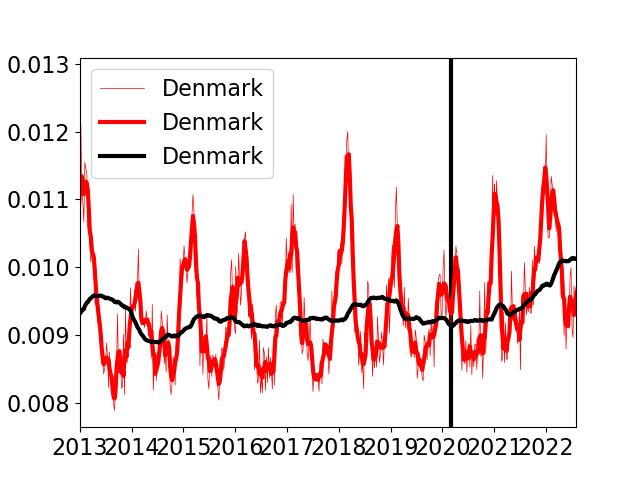

In [10]:
fig,ax = plt.subplots()

# ax.plot(dfDKshort.Date,dfDKshort['Total'],color='r',label='Denmark')
# ax.plot(dfSEshort.Date,dfSEshort['Total'],color='b',label='Sweden')
# ax.plot(dfDKshort.Date,dfDKshort['Total.1'],'.-',color='r',label='Denmark',lw=0.5)
# ax.plot(dfSEshort.Date,dfSEshort['Total.1'],'.-',color='b',label='Sweden',lw=0.5)
ax.plot(dfDKshort.Date,dfDKshort['Total.1'],color='r',label='Denmark',lw=0.5)
# ax.plot(dfSEshort.Date,dfSEshort['Total.1'],color='b',label='Sweden',lw=0.5)
mw = 4
ax.plot(rnTime(dfDKshort.Date,mw),rnMean(dfDKshort['Total.1'],mw),color='r',label='Denmark')
# ax.plot(rnTime(dfSEshort.Date,mw),rnMean(dfSEshort['Total.1'],mw),color='b',label='Sweden')
mw = 52
ax.plot(dfDKshort.Date[51:],rnMean(dfDKshort['Total.1'],mw),color='k',label='Denmark')
# ax.plot(dfDKshort.Date[:-51],rnMean(dfDKshort['Total.1'],mw),color='k',label='Denmark')
# ax.plot(rnTime2(dfSEshort.Date,mw),rnMean(dfSEshort['Total.1'],mw),color='b',label='Sweden')
# mw = 52
# ax.plot(rnTime(dfDKshort.Date,mw),rnMean(dfDKshort['Total.1'],mw),color='r',ls=':',label='Denmark')
# ax.plot(rnTime(dfSEshort.Date,mw),rnMean(dfSEshort['Total.1'],mw),color='b',ls=':',label='Sweden')
ax.legend()

ax.set_xlim(left=np.datetime64('2013-01-01'),right=np.datetime64('2022-08-01'))

ax.axvline(np.datetime64('2020-03-01'),color='k',zorder=-2)

In [11]:
# dfDKshort

dfDKshorter = dfDKshort[dfDKshort.Year >= 2016]



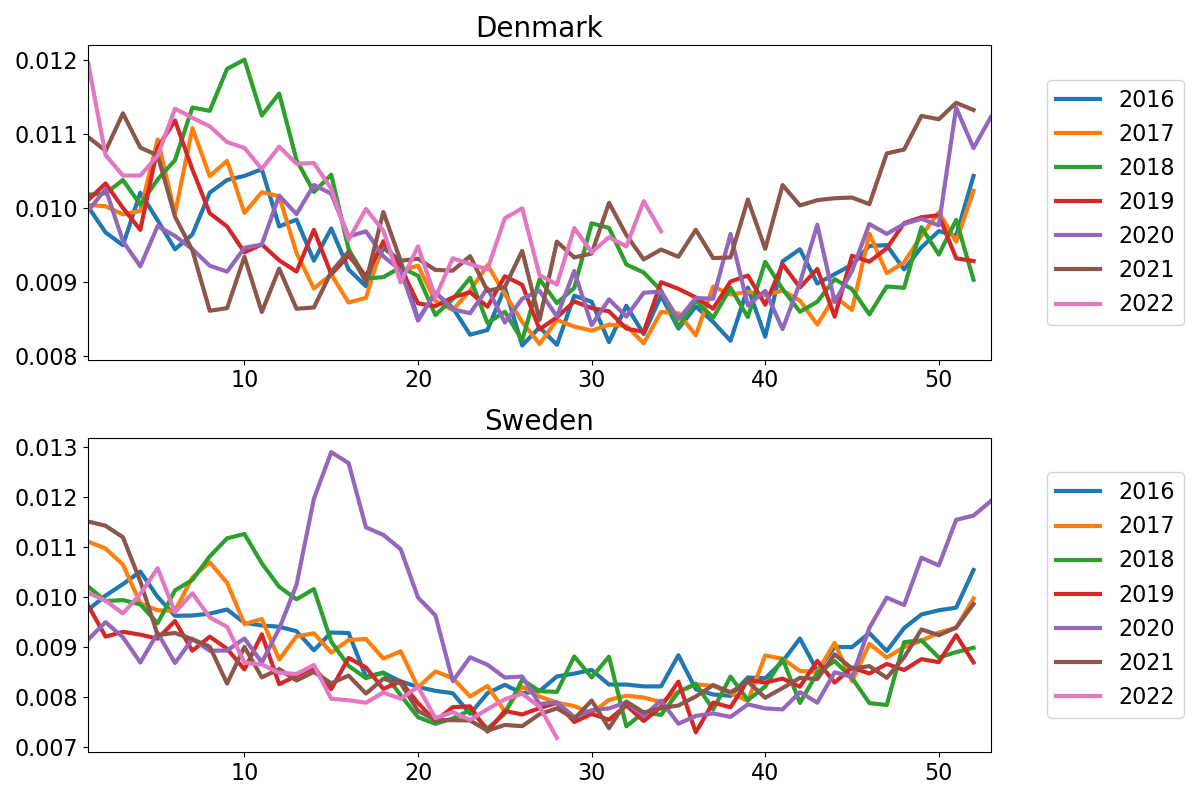

In [12]:
fig,(ax,ax2) = plt.subplots(2,1,figsize=(12,8))

for curYear in range(2016,2023):
    curdf = dfDKshort[dfDKshort.Year == curYear]
    ax.plot(curdf.Week,curdf['Total.1'],label=curYear)
    curdf = dfSEshort[dfSEshort.Year == curYear]
    ax2.plot(curdf.Week,curdf['Total.1'],label=curYear)

ax.legend(loc='center left',bbox_to_anchor=(1.05,0.5))
ax2.legend(loc='center left',bbox_to_anchor=(1.05,0.5))

ax.set_xlim([1,53])
ax2.set_xlim([1,53])

ax.set_title('Denmark')
ax2.set_title('Sweden')

fig.tight_layout()

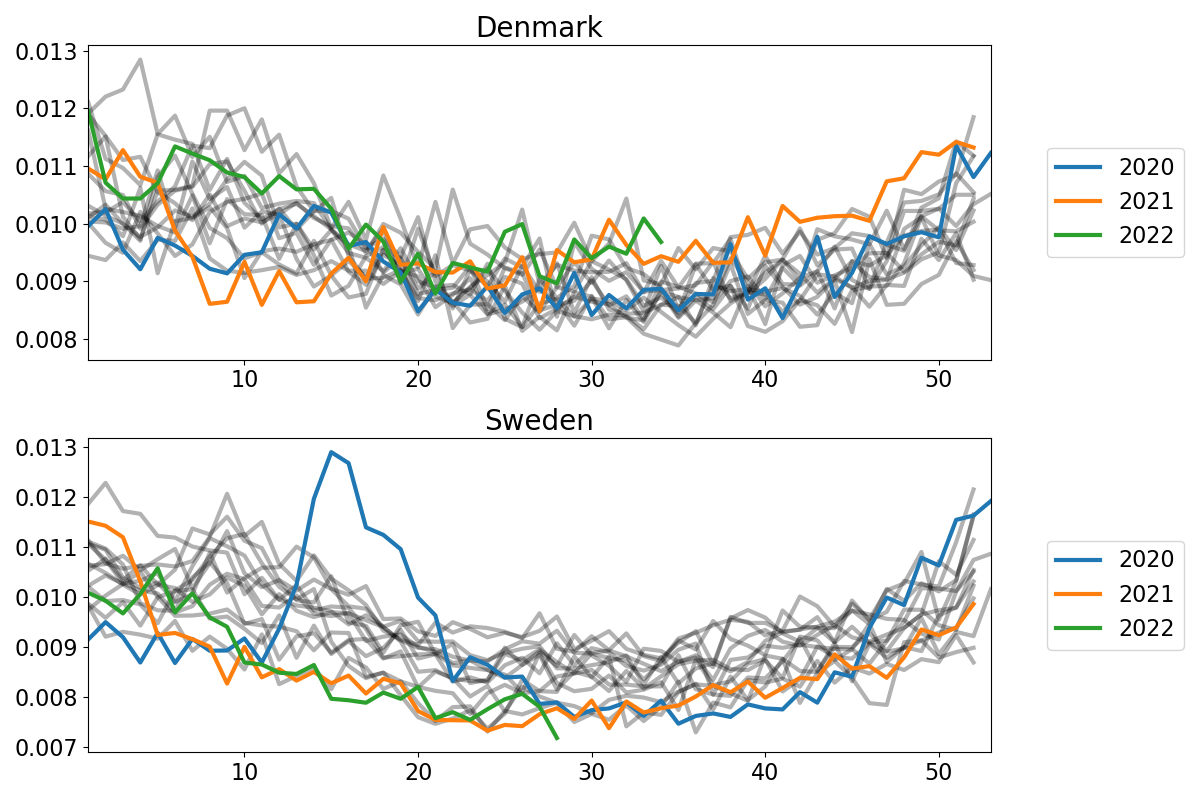

In [13]:
fig,(ax,ax2) = plt.subplots(2,1,figsize=(12,8))

for curYear in range(2007,2020):
    curdf = dfDKshort[dfDKshort.Year == curYear]
    ax.plot(curdf.Week,curdf['Total.1'],color=(0,0,0,0.3))
    curdf = dfSEshort[dfSEshort.Year == curYear]
    ax2.plot(curdf.Week,curdf['Total.1'],color=(0,0,0,0.3))
for curYear in range(2020,2023):
    curdf = dfDKshort[dfDKshort.Year == curYear]
    ax.plot(curdf.Week,curdf['Total.1'],label=curYear)
    curdf = dfSEshort[dfSEshort.Year == curYear]
    ax2.plot(curdf.Week,curdf['Total.1'],label=curYear)

ax.legend(loc='center left',bbox_to_anchor=(1.05,0.5))
ax2.legend(loc='center left',bbox_to_anchor=(1.05,0.5))

ax.set_xlim([1,53])
ax2.set_xlim([1,53])

ax.set_title('Denmark')
ax2.set_title('Sweden')

fig.tight_layout()

In [14]:
dfDKshorter = dfDKshort[(dfDKshort.Year >= 2016) & (dfDKshort.Year <= 2019)]
dfSEshorter = dfSEshort[(dfSEshort.Year >= 2016) & (dfSEshort.Year <= 2019)]
# 
# dfDKshorter

In [15]:
curweek = 52
dfDKshorter[dfDKshorter.Week == curweek]['Total.1'].sum()/4

0.009743304386344874

In [16]:
weekVals_DK = []
weekVals_SE = []
for curweek in range(1,53):

    curVal = dfDKshorter[dfDKshorter.Week == curweek]['Total.1'].sum()/4

    weekVals_DK.append(curVal)

    curVal = dfSEshorter[dfSEshorter.Week == curweek]['Total.1'].sum()/4

    weekVals_SE.append(curVal)

    # ax.plot(curweek,curVal,'*k')

In [17]:
weekNums = np.arange(1,53)

_df = pd.DataFrame(data={'week':weekNums})

dates2020 = '2020-W'+_df['week'].astype(str).str.zfill(2)
weekDTs2020 = [datetime.datetime.strptime(x + '-1', "%Y-W%W-%w") for x in dates2020]
dates2021 = '2021-W'+_df['week'].astype(str).str.zfill(2)
weekDTs2021 = [datetime.datetime.strptime(x + '-1', "%Y-W%W-%w") for x in dates2021]
dates2022 = '2022-W'+_df['week'].astype(str).str.zfill(2)
weekDTs2022 = [datetime.datetime.strptime(x + '-1', "%Y-W%W-%w") for x in dates2022]

In [18]:
# np.datetime64(weekDTs2020[-1])  + np.timedelta64(7,'D')

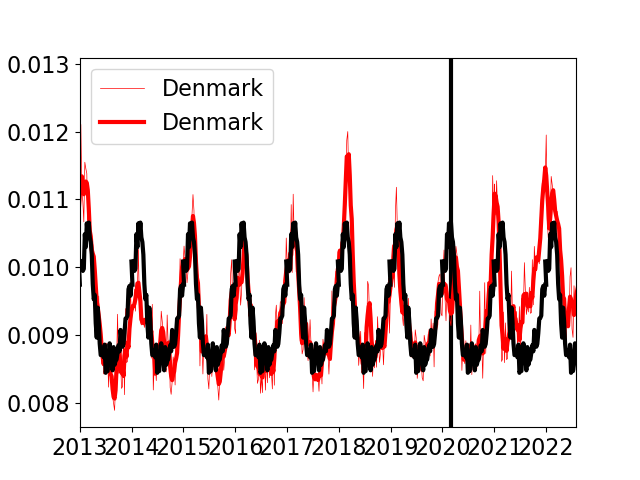

In [19]:
fig,ax = plt.subplots()

# ax.plot(dfDKshort.Date,dfDKshort['Total'],color='r',label='Denmark')
# ax.plot(dfSEshort.Date,dfSEshort['Total'],color='b',label='Sweden')
# ax.plot(dfDKshort.Date,dfDKshort['Total.1'],'.-',color='r',label='Denmark',lw=0.5)
# ax.plot(dfSEshort.Date,dfSEshort['Total.1'],'.-',color='b',label='Sweden',lw=0.5)
ax.plot(dfDKshort.Date,dfDKshort['Total.1'],color='r',label='Denmark',lw=0.5)
# ax.plot(dfSEshort.Date,dfSEshort['Total.1'],color='b',label='Sweden',lw=0.5)
mw = 4
ax.plot(rnTime(dfDKshort.Date,mw),rnMean(dfDKshort['Total.1'],mw),color='r',label='Denmark')
# ax.plot(rnTime(dfSEshort.Date,mw),rnMean(dfSEshort['Total.1'],mw),color='b',label='Sweden')


# ax.plot(weekDTs2020,weekVals_DK,'k')
# ax.plot(weekDTs2021,weekVals_DK,'k')
# ax.plot(weekDTs2022,weekVals_DK,'k')

weekNums = np.arange(1,53)


for curYear in range(2010,2023):
    _df = pd.DataFrame(data={'week':weekNums})

    dates2020 = str(curYear)+'-W'+_df['week'].astype(str).str.zfill(2)
    weekDTs2020 = [datetime.datetime.strptime(x + '-1', "%Y-W%W-%w") for x in dates2020]

    ax.plot(weekDTs2020,weekVals_DK,'k')
    ax.plot([np.datetime64(weekDTs2020[-1]),np.datetime64(weekDTs2020[-1])+np.timedelta64(7,'D')],[weekVals_DK[0],weekVals_DK[-1]],'k')

ax.legend()

ax.set_xlim(left=np.datetime64('2013-01-01'),right=np.datetime64('2022-08-01'))

ax.axvline(np.datetime64('2020-03-01'),color='k',zorder=-2)

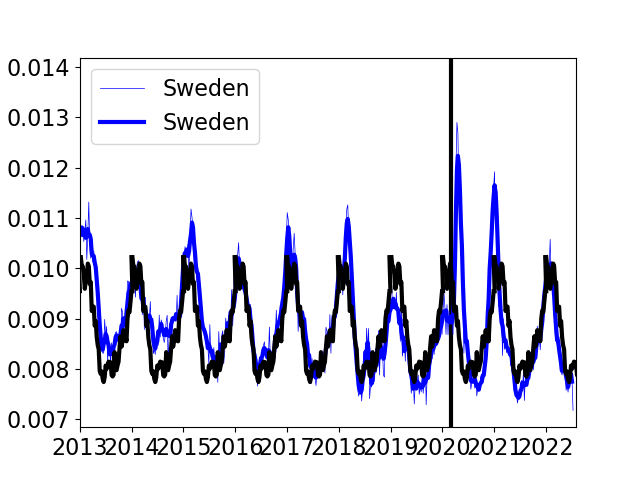

In [20]:
fig,ax = plt.subplots()

ax.plot(dfSEshort.Date,dfSEshort['Total.1'],color='b',label='Sweden',lw=0.5)
mw = 4
ax.plot(rnTime(dfSEshort.Date,mw),rnMean(dfSEshort['Total.1'],mw),color='b',label='Sweden')


weekNums = np.arange(1,53)


for curYear in range(2010,2023):
    _df = pd.DataFrame(data={'week':weekNums})

    dates2020 = str(curYear)+'-W'+_df['week'].astype(str).str.zfill(2)
    weekDTs2020 = [datetime.datetime.strptime(x + '-1', "%Y-W%W-%w") for x in dates2020]

    ax.plot(weekDTs2020,weekVals_SE,'k')
    ax.plot([np.datetime64(weekDTs2020[-1]),np.datetime64(weekDTs2020[-1])+np.timedelta64(7,'D')],[weekVals_SE[0],weekVals_SE[-1]],'k')

ax.legend()

ax.set_xlim(left=np.datetime64('2013-01-01'),right=np.datetime64('2022-08-01'))

ax.axvline(np.datetime64('2020-03-01'),color='k',zorder=-2)

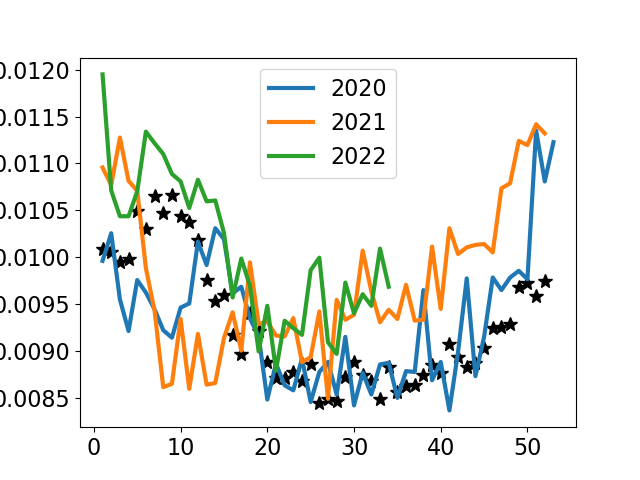

In [21]:
fig,ax = plt.subplots()


for curweek in range(1,53):

    curVal = dfDKshorter[dfDKshorter.Week == curweek]['Total.1'].sum()/4

    ax.plot(curweek,curVal,'*k')

for curYear in range(2020,2023):
    curdf = dfDKshort[dfDKshort.Year == curYear]
    ax.plot(curdf.Week,curdf['Total.1'],label=curYear)
    # curdf = dfSEshort[dfSEshort.Year == curYear]
    # ax2.plot(curdf.Week,curdf['Total.1'],label=curYear)

ax.legend()